In [4]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt
import kalepy as kale


import matplotlib.cm as cm
from holodeck import plot
from holodeck.constants import YR, MSOL

# Cython sorting

meshgrid, defining random h2fdf and bgnum

In [ ]:
# M = 2
# Q = 1
# Z = 3
# F = 2
# h2fdf = np.zeros((M,Q,Z,F))
# bgnum = np.zeros((M,Q,Z,F))
# mqz = np.zeros((3,M,Q,Z))
# for mm in range(M):
#     for qq in range(Q):
#         for zz in range(Z):
#             mqz[0,mm,qq,zz] = mm
#             mqz[1,mm,qq,zz] = qq
#             mqz[2,mm,qq,zz] = zz
#             for ff in range(F):
#                 h2fdf[mm,qq,zz,ff] = np.random.uniform(1,10)
#                 bgnum[mm,qq,zz,ff] = int(np.random.uniform(0,5))
                
# print(h2fdf)
# print(bgnum)
# m_i = np.arange(M) 
# q_i = np.arange(Q)
# z_i = np.arange(Z)
# m_idx, q_idx, z_idx = np.meshgrid(m_i, q_i, z_i, indexing='ij')

In [ ]:
# print(mqz[0,:,:,:] == m_idx)
# print(mqz[1,:,:] == q_idx)
# print(mqz[2,:,:]==z_idx)
# print(np.all(mqz==np.array([m_idx, q_idx, z_idx])))
# # meshgrid for indeing works!

In [ ]:
cy.sort_h2fdf(h2fdf)

In [ ]:
copy = np.copy(h2fdf.reshape(M,Q,Z,F))
h2fdf = h2fdf.reshape(M*Q*Z, F)

bgnum = bgnum.reshape(M*Q*Z, F)
m_idx = m_idx.reshape(M*Q*Z)
q_idx = q_idx.reshape(M*Q*Z)
z_idx = z_idx.reshape(M*Q*Z)

indices = np.argsort(-h2fdf, axis=0)
print(indices.shape)
print(h2fdf.shape)
for ff in range(len(h2fdf[0])):
    print('\nff =', ff)
    for hh in range(len(h2fdf)):
        ii = indices[hh,ff]
        mm = m_idx[ii]
        qq = q_idx[ii]
        zz = z_idx[ii]
        print(h2fdf[ii,ff],copy[mm,qq,zz,ff])
        print(mm,qq,zz, np.unravel_index(ii, (M,Q,Z)))
        

In [ ]:
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
print((unraveled).shape)
msort = unraveled[0,:,:]
qsort = unraveled[1,:,:]
zsort = unraveled[2,:,:]
print(msort.shape)

In [ ]:
print(h2fdf.shape)

In [ ]:
for ff in range(len(h2fdf[0])):
    print('\nff =', ff)
    for hh in range(len(h2fdf)):
        ii = indices[hh,ff]
        mm = m_idx[ii]
        qq = q_idx[ii]
        zz = z_idx[ii]
        print(h2fdf[ii,ff],copy[mm,qq,zz,ff])
        print(mm,qq,zz, np.unravel_index(ii, (M,Q,Z)), msort[hh,ff], qsort[hh,ff], zsort[hh,ff])

pass cython 
h2fdf [MxQxZ, F]
sorted [MxQxZ, F] (argsort)
edges [M,Q,Z,F]
sorted []

In [ ]:
# summary so far:
# setup random example h2fdf
M = 2
Q = 1
Z = 3
F = 2
h2fdf = np.zeros((M,Q,Z,F))
bgnum = np.zeros((M,Q,Z,F))
for mm in range(M):
    for qq in range(Q):
        for zz in range(Z):
            for ff in range(F):
                h2fdf[mm,qq,zz,ff] = np.random.uniform(1,10)
                bgnum[mm,qq,zz,ff] = int(np.random.uniform(0,5))

In [ ]:
# sort and index
indices = np.argsort(-h2fdf.reshape(M*Q*Z, F), axis=0)
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
msort = unraveled[0,:,:]
qsort = unraveled[1,:,:]
zsort = unraveled[2,:,:]


In [ ]:
# test
print(h2fdf.shape)
for ff in range(F):
    for hh in range(len(indices)-1):
        # cur = h2fdf[indices[hh], ff]
        # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
        # true of any sort
        assert((h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff]) > (h2fdf[msort[hh+1,ff], qsort[hh+1,ff], zsort[hh+1,ff], ff]))
        
        # true for a real h2fdf (same across frequencies)
        assert(msort[hh,0]==msort[hh,1])
        assert(qsort[hh,0]==qsort[hh,1])
        assert(zsort[hh,0]==zsort[hh,1])


## example 5

In [5]:
edges, number, fobs, exname = ss.example5()
h2fdf = ss.h2fdf(edges)
mt = kale.utils.midpoints(edges[0]) #: total mass
mr = kale.utils.midpoints(edges[1]) #: mass ratio
rz = kale.utils.midpoints(edges[2]) #: redshift

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [6]:
M = number.shape[0]
Q = number.shape[1]
Z = number.shape[2]
F = number.shape[3]
print(M,Q,Z,F)

60 80 100 25


In [7]:
# # sort and index
# indices = np.argsort(-h2fdf.reshape(M*Q*Z, F), axis=0)
# unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
# msort = unraveled[0,:,:]
# qsort = unraveled[1,:,:]
# zsort = unraveled[2,:,:]


In [8]:
# # test
# print(h2fdf.shape)
# for ff in range(F):
#     for hh in range(len(indices)-1):
#         # cur = h2fdf[indices[hh], ff]
#         # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
#         # true of any sort
#         assert((h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff]) > (h2fdf[msort[hh+1,ff], qsort[hh+1,ff], zsort[hh+1,ff], ff]))
        
#         # true for a real h2fdf (same across frequencies)
#         assert(msort[hh,0]==msort[hh,1])
#         assert(qsort[hh,0]==qsort[hh,1])
#         assert(zsort[hh,0]==zsort[hh,1])


so actually, we don't need to do it for every frequency

In [9]:
# sort and index
indices = np.argsort(-h2fdf[...,0].flatten()) # just sort for first frequency
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
print(unraveled.shape)
msort = unraveled[0,:]
qsort = unraveled[1,:]
zsort = unraveled[2,:]
print(msort.shape)

(3, 480000)
(480000,)


In [10]:
# test
print(h2fdf.shape)
for ff in range(F):
    for hh in range(len(indices)-1):
        # cur = h2fdf[indices[hh], ff]
        # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
        # true of any sort
        assert((h2fdf[msort[hh], qsort[hh], zsort[hh], ff]) > (h2fdf[msort[hh+1], qsort[hh+1], zsort[hh+1], ff]))
            


(60, 80, 100, 25)


pass to cython
* h2fdf (M,Q,Z,F) NDarray
* number (M,Q,Z,F) NDarray
* msort, qsort, zsort; each is an (MxQxZ) 1Darray
* nreals : int
* nloudest : int
* mt : (M,) 1Darray
* mr : (Q,) 1Darray
* rz : (Z,) 1Darray

return
* hc2ls : (F,R,L) NDarray
* hc2bg : (F,R) NDarray
* bgpar
* lspar

In [11]:
R=10
L=5
hc2ls, hc2bg = cy.loudest_hc_from_sorted(number, h2fdf, R, L, 
                                         mt, mr, rz, 
                                         msort, qsort, zsort)
print(hc2ls.shape, hc2bg.shape)
hc_ls = np.sqrt(hc2ls)
hc_bg = np.sqrt(hc2bg)

(25, 10, 5) (25, 10)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from holodeck import plot
from holodeck.constants import YR, MSOL

In [ ]:
print(len(hc_ls[0,0]))

In [ ]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])

xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the median background
ax.plot(xx, np.median(hc_bg, axis=1), label='bg median', color='k', lw=3, alpha=.5)

# plot all single sources in the first realization
REALS = 3
colors = cm.rainbow(np.linspace(0,1,REALS))
for rr in range(REALS):
    ax.plot(xx, hc_bg[:,rr], lw=2.0, alpha=0.5, color=colors[rr], linestyle='solid')
    for ll in range(len(hc_ls[0,0])):
        if(ll==0): 
            edgecolor = 'k'
            alpha = 0.7
        else: 
            edgecolor = None
            alpha = 0.4
        ax.scatter(xx,hc_ls[:,rr,ll], color=colors[rr], marker='o', s=80,
                    edgecolor=edgecolor, alpha=alpha)

# plot the model with Poisson sampling
# ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], REALS=1, COLOR='b')


legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

## cy.loudest_hc_and_par_from_sorted()

In [12]:
nreals = 15
nloudest = 10
hc2ls, hc2bg, lspar, bgpar, lsidx = cy.loudest_hc_and_par_from_sorted(number, h2fdf, nreals, nloudest, 
                                                                      mt, mr, rz, msort, qsort, zsort)
print(hc2ls.shape, hc2bg.shape)
hc_ls = np.sqrt(hc2ls)
hc_bg = np.sqrt(hc2bg)

(25, 15, 10) (25, 15)


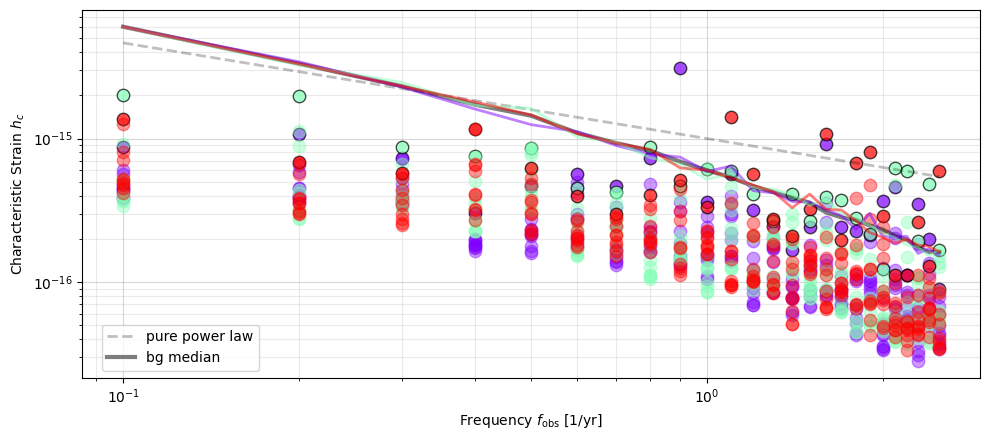

In [13]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])

xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the median background
ax.plot(xx, np.median(hc_bg, axis=1), label='bg median', color='k', lw=3, alpha=.5)

# plot all single sources in the first realization
REALS = 3
colors = cm.rainbow(np.linspace(0,1,REALS))
for rr in range(REALS):
    ax.plot(xx, hc_bg[:,rr], lw=2.0, alpha=0.5, color=colors[rr], linestyle='solid')
    for ll in range(len(hc_ls[0,0])):
        if(ll==0): 
            edgecolor = 'k'
            alpha = 0.7
        else: 
            edgecolor = None
            alpha = 0.4
        ax.scatter(xx,hc_ls[:,rr,ll], color=colors[rr], marker='o', s=80,
                    edgecolor=edgecolor, alpha=alpha)

# plot the model with Poisson sampling
# ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], REALS=1, COLOR='b')


legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

plot params

In [14]:
print(bgpar.shape, hc_bg.shape)

(3, 25, 15) (25, 15)


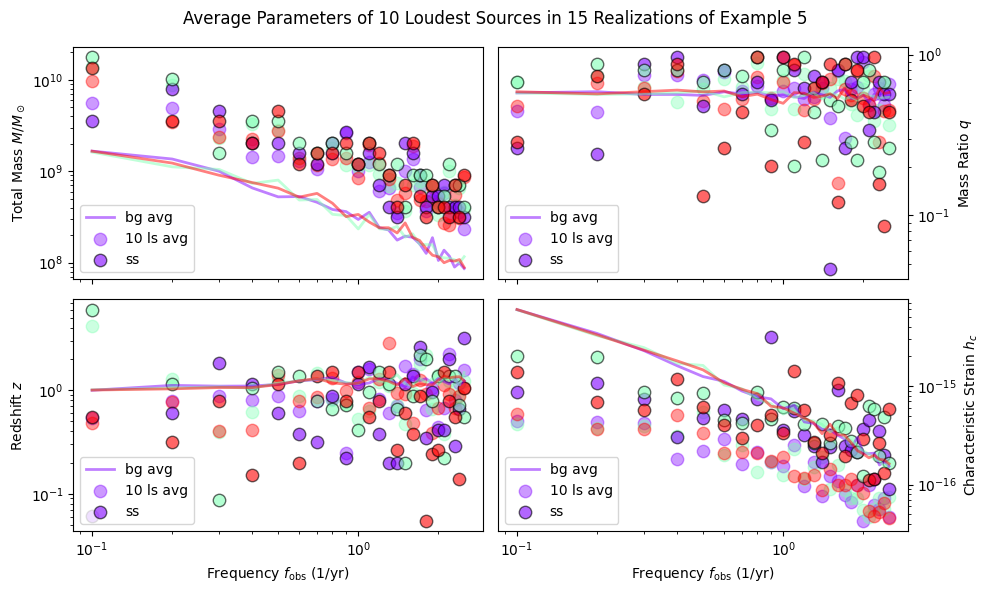

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Average Parameters of %d Loudest Sources in %d Realizations of ' % (nloudest,hc_bg.shape[1]))
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
BG_PARAMS = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ls_marr = lspar[0,:,:]
ls_qarr = lspar[1,:,:]
ls_zarr = lspar[2,:,:]
LS_PARAMS = np.array([[ls_marr/MSOL, ls_qarr], [ls_zarr, np.median(hc_ls, axis=2)]])

# single loudest sources at lsidx[:,:,:,0]
ssidx = lsidx[...,0]
ss_marr = mt[ssidx[0,:,:]]
ss_qarr = mr[ssidx[1,:,:]]
ss_zarr = rz[ssidx[2,:,:]]
SS_PARAMS = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ls[...,0]]])

# from single_sources.py
TITLES = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                                   ['Redshift $z$', 'Characteristic Strain $h_c$']])
XLABEL = 'Frequency $f_\mathrm{obs}$ (1/yr)'
REALS = 3  
SHOW_GRID = False  
SHOW_LEGEND = True
LABEL=''           
colors = cm.rainbow(np.linspace(0,1,REALS))
for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(TITLES[ii,jj])
        # if(ii==0 or jj==0): # mass, ratio, or redshift
        #     # bin edges
        #     for kk in range(len(grid[ii,jj])):
        #         if(kk==0): edgelabel='edges'
        #         else: edgelabel=None 
        #         if(SHOW_GRID == True):
        #             axs[ii,jj].axhline(grid[ii,jj][kk], color='k', alpha=0.6, lw=0.15, label=edgelabel)
                
        if(BG_PARAMS is not None):
            for rr in range(REALS):
                if(rr==0): bglabel = 'bg avg'+LABEL
                else: bglabel = None
                axs[ii,jj].plot(xx, BG_PARAMS[ii,jj,:,rr], label=bglabel,
                                color=colors[rr], lw=2.0, alpha=0.5,
                                linestyle='solid',)
        if (LS_PARAMS is not None):
            # loudest source realizations
            for rr in range(REALS):
                if(rr==0): lslabel = str(nloudest)+' ls avg'+LABEL
                else: lslabel = None
                axs[ii,jj].scatter(xx, LS_PARAMS[ii,jj,:,rr], label=lslabel,
                                    color=colors[rr], marker='o', s=80, 
                                    alpha=0.4)
        if (SS_PARAMS is not None):
            # single source realizations
            for rr in range(REALS):
                if(rr==0): sslabel = 'ss'+LABEL
                else: sslabel = None
                axs[ii,jj].scatter(xx, SS_PARAMS[ii,jj,:,rr], label=sslabel,
                                    color=colors[rr], marker='o', s=80, 
                                    alpha=0.6, edgecolor='k')
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')
        if(ii==1): axs[ii,jj].set_xlabel(XLABEL)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()
        if(SHOW_LEGEND): axs[ii,jj].legend(loc='lower left')


fig.tight_layout()

In [16]:
print(ss_marr[:5,0]) # first realization, 5 freqs
print(ls_marr[:5,0])

[6.98358537e+42 1.56343002e+43 9.13576907e+42 4.08079814e+42
 4.08079814e+42]
[1.10049939e+43 9.72364861e+42 5.71891045e+42 2.83224420e+42
 2.92156805e+42]


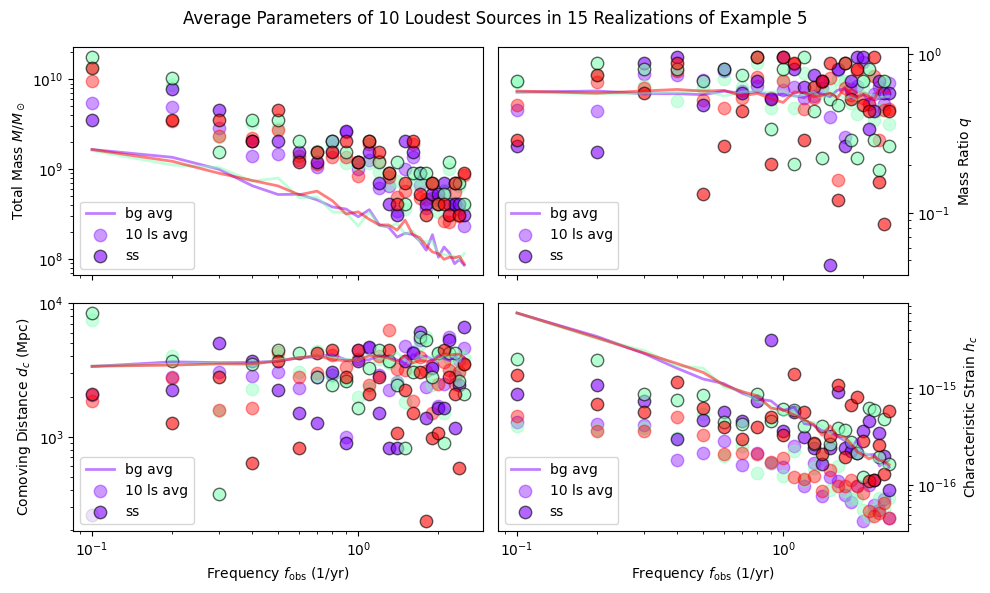

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Average Parameters of %d Loudest Sources in %d Realizations of ' % (nloudest,hc_bg.shape[1]))
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_darr = holo.cosmo.comoving_distance(bg_zarr).si.value * 3.241 * 10**-23 # Mpc
BG_PARAMS = np.array([[bg_marr/MSOL, bg_qarr], [bg_darr, hc_bg]])

ls_marr = lspar[0,:,:]
ls_qarr = lspar[1,:,:]
ls_zarr = lspar[2,:,:]
ls_darr = holo.cosmo.comoving_distance(ls_zarr).si.value * 3.241 * 10**-23 # Mpc
LS_PARAMS = np.array([[ls_marr/MSOL, ls_qarr], [ls_darr, np.median(hc_ls, axis=2)]])

# single loudest sources at lsidx[:,:,:,0]
ssidx = lsidx[...,0]
ss_marr = mt[ssidx[0,:,:]]
ss_qarr = mr[ssidx[1,:,:]]
ss_zarr = rz[ssidx[2,:,:]]
ss_darr = holo.cosmo.comoving_distance(ss_zarr).si.value * 3.241 * 10**-23 # Mpc
SS_PARAMS = np.array([[ss_marr/MSOL, ss_qarr], [ss_darr, hc_ls[...,0]]])

# from single_sources.py
TITLES = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                                   ['Comoving Distance $d_c$ (Mpc)', 'Characteristic Strain $h_c$']])
XLABEL = 'Frequency $f_\mathrm{obs}$ (1/yr)'
REALS = 3  
SHOW_GRID = False  
SHOW_LEGEND = True
LABEL=''           
colors = cm.rainbow(np.linspace(0,1,REALS))
for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(TITLES[ii,jj])
        # if(ii==0 or jj==0): # mass, ratio, or redshift
        #     # bin edges
        #     for kk in range(len(grid[ii,jj])):
        #         if(kk==0): edgelabel='edges'
        #         else: edgelabel=None 
        #         if(SHOW_GRID == True):
        #             axs[ii,jj].axhline(grid[ii,jj][kk], color='k', alpha=0.6, lw=0.15, label=edgelabel)
                
        if(BG_PARAMS is not None):
            for rr in range(REALS):
                if(rr==0): bglabel = 'bg avg'+LABEL
                else: bglabel = None
                axs[ii,jj].plot(xx, BG_PARAMS[ii,jj,:,rr], label=bglabel,
                                color=colors[rr], lw=2.0, alpha=0.5,
                                linestyle='solid',)
        if (LS_PARAMS is not None):
            # loudest source realizations
            for rr in range(REALS):
                if(rr==0): lslabel = str(nloudest)+' ls avg'+LABEL
                else: lslabel = None
                axs[ii,jj].scatter(xx, LS_PARAMS[ii,jj,:,rr], label=lslabel,
                                    color=colors[rr], marker='o', s=80, 
                                    alpha=0.4)
        if (SS_PARAMS is not None):
            # single source realizations
            for rr in range(REALS):
                if(rr==0): sslabel = 'ss'+LABEL
                else: sslabel = None
                axs[ii,jj].scatter(xx, SS_PARAMS[ii,jj,:,rr], label=sslabel,
                                    color=colors[rr], marker='o', s=80, 
                                    alpha=0.6, edgecolor='k')
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')
        if(ii==1): axs[ii,jj].set_xlabel(XLABEL)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()
        if(SHOW_LEGEND): axs[ii,jj].legend(loc='lower left')


fig.tight_layout()

In [20]:
print(holo.cosmo.comoving_distance(rz).si.unit)

m


### Individual parameters of 10 loudest sources from a single realization

In [26]:
print(lsidx.shape)

(3, 25, 15, 10)


In [30]:
F = len(hc_bg)
R = len(hc_bg[0])
L = len(hc_ls[0,0])
print('F,R,L =',F,R,L)
ll_marr = np.zeros((F,R,L))
ll_qarr = np.zeros((F,R,L))
ll_zarr = np.zeros((F,R,L))
for ll in range(nloudest):
    llidx = lsidx[...,ll]
    ll_marr[...,ll] = mt[llidx[0,:,:]]
    ll_qarr[...,ll] = mr[llidx[1,:,:]]
    ll_zarr[...,ll] = rz[llidx[2,:,:]]
ll_darr = holo.cosmo.comoving_distance(ll_zarr).si.value * 3.241 * 10**-23 # Mpc


F,R,L = 25 15 10


In [31]:
print(hc_ls.shape)

(25, 15, 10)


In [33]:
print(ll_marr.shape)

(25, 15, 10)


In [37]:
print(hc_bg.shape[1])

15


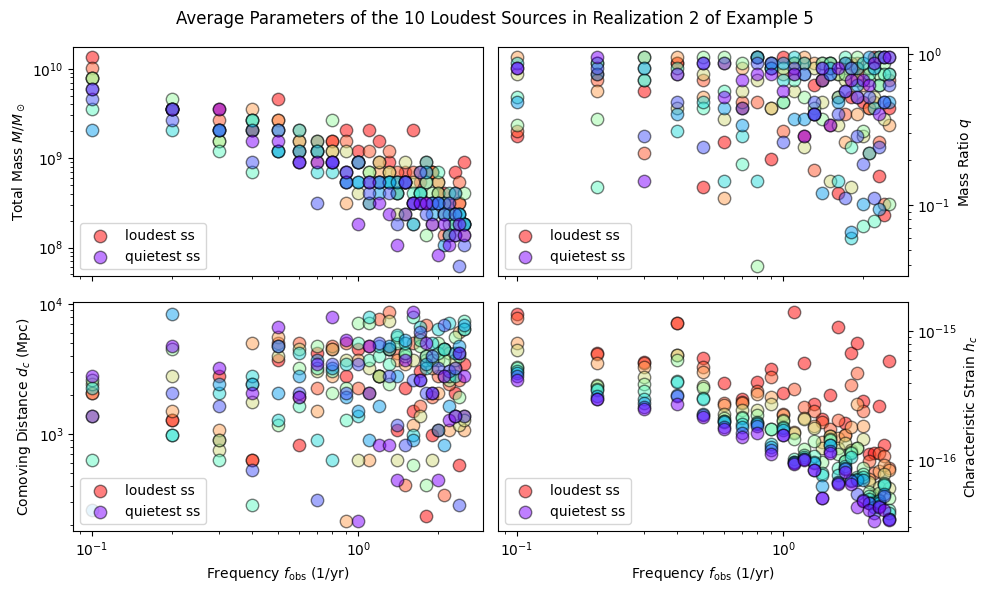

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
rr = 2
fig.suptitle(('Average Parameters of the %d Loudest Sources in Realization %d of ' % (L,rr))
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

# shape(2, 2) each piece shape (F, R, L)
LL_PARAMS = np.array([[ll_marr/MSOL, ll_qarr], [ll_darr, hc_ls]])

# from single_sources.py
TITLES = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                                   ['Comoving Distance $d_c$ (Mpc)', 'Characteristic Strain $h_c$']])
XLABEL = 'Frequency $f_\mathrm{obs}$ (1/yr)'
SHOW_GRID = False  
SHOW_LEGEND = True
LABEL=''           
colors = cm.rainbow(np.linspace(1,0,L))
for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(TITLES[ii,jj])
        # if(ii==0 or jj==0): # mass, ratio, or redshift
        #     # bin edges
        #     for kk in range(len(grid[ii,jj])):
        #         if(kk==0): edgelabel='edges'
        #         else: edgelabel=None 
        #         if(SHOW_GRID == True):
        #             axs[ii,jj].axhline(grid[ii,jj][kk], color='k', alpha=0.6, lw=0.15, label=edgelabel)
                
        if (SS_PARAMS is not None):
            # single source realizations
            for ll in range(L):
                if(ll==0): 
                    sslabel = 'loudest ss'+LABEL
                elif(ll==L-1): 
                    sslabel = 'quietest ss'+LABEL
                else: 
                    sslabel = None
                axs[ii,jj].scatter(xx, LL_PARAMS[ii,jj,:,rr,ll], label=sslabel,
                                    color=colors[ll], marker='o', s=80, 
                                    alpha=0.5, edgecolor='k')
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')
        if(ii==1): axs[ii,jj].set_xlabel(XLABEL)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()
        if(SHOW_LEGEND): axs[ii,jj].legend(loc='lower left')


fig.tight_layout()

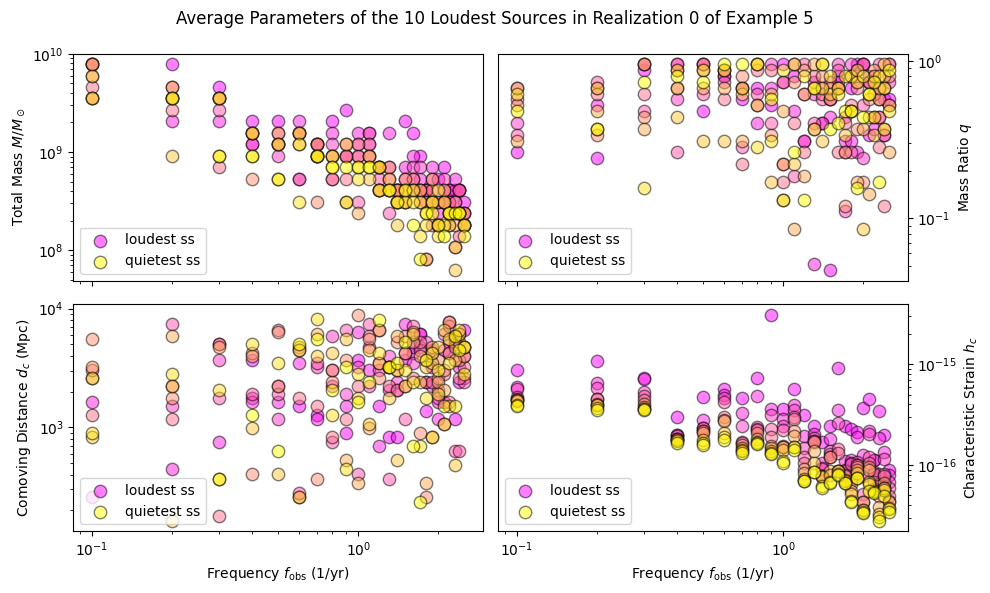

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
rr = 0
fig.suptitle(('Average Parameters of the %d Loudest Sources in Realization %d of ' % (L,rr))
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

# shape(2, 2) each piece shape (F, R, L)
LL_PARAMS = np.array([[ll_marr/MSOL, ll_qarr], [ll_darr, hc_ls]])

# from single_sources.py
TITLES = np.array([['Total Mass $M/M_\odot$', 'Mass Ratio $q$'], 
                                   ['Comoving Distance $d_c$ (Mpc)', 'Characteristic Strain $h_c$']])
XLABEL = 'Frequency $f_\mathrm{obs}$ (1/yr)'
SHOW_GRID = False  
SHOW_LEGEND = True
LABEL=''           
colors = cm.spring(np.linspace(0,1,L))
for ii in range(len(axs)):
    for jj in range(len(axs)):
        axs[ii,jj].set_ylabel(TITLES[ii,jj])
        # if(ii==0 or jj==0): # mass, ratio, or redshift
        #     # bin edges
        #     for kk in range(len(grid[ii,jj])):
        #         if(kk==0): edgelabel='edges'
        #         else: edgelabel=None 
        #         if(SHOW_GRID == True):
        #             axs[ii,jj].axhline(grid[ii,jj][kk], color='k', alpha=0.6, lw=0.15, label=edgelabel)
                
        if (SS_PARAMS is not None):
            # single source realizations
            for ll in range(L):
                if(ll==0): 
                    sslabel = 'loudest ss'+LABEL
                elif(ll==L-1): 
                    sslabel = 'quietest ss'+LABEL
                else: 
                    sslabel = None
                axs[ii,jj].scatter(xx, LL_PARAMS[ii,jj,:,rr,ll], label=sslabel,
                                    color=colors[ll], marker='o', s=80, 
                                    alpha=0.5, edgecolor='k')
        axs[ii,jj].set_yscale('log')
        axs[ii,jj].set_xscale('log')
        if(ii==1): axs[ii,jj].set_xlabel(XLABEL)
        if(jj==1):
            axs[ii,jj].yaxis.set_label_position("right")
            axs[ii,jj].yaxis.tick_right()
        if(SHOW_LEGEND): axs[ii,jj].legend(loc='lower left')


fig.tight_layout()